# Visualizations Demo

This notebook shows some of the tools in PyLorentz for displaying and plotting images. 

PyLorentz uses colormaps from [Colorcet](https://colorcet.com/index.html) as well as those built in to [Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html). 

In [1]:
import numpy as np

from PyLorentz.utils.magnetizations import hopfion, bloch
from PyLorentz.visualize import show_im, show_2D, lineplot_im
import colorcet as cc
import matplotlib.pyplot as plt

## show_im

The default colormap for ``show_im`` is `'gray'`. Other good linear colormaps include `'magma'` or `'viridis'` from matplotlib, or `colorcet.cm.CET_L08` from colorcet. The default diverging colormap is `'coolwarm'` from matplotlib. 

In [2]:
bloch_z, bloch_y, bloch_x = bloch(dim=256,
                   chirality="cw",
                   pad=32,
                   ir=0,
                   bkg="pos")

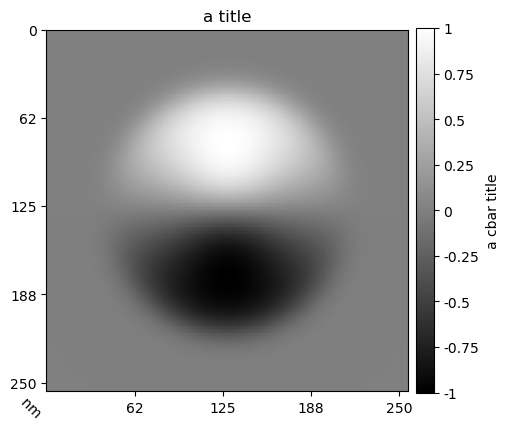

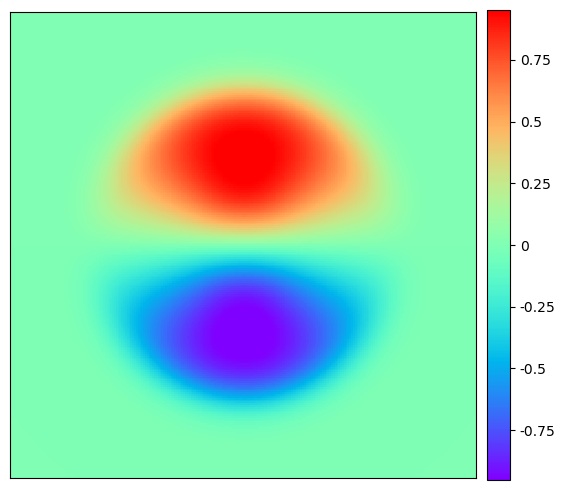

In [3]:
show_im(bloch_x,
        title="a title",
        scale=1, # nm/pixel
        simple=False, # hide cbar and axis labels if True
        save=None, # /path/to/file.png that will be saved, dpi as kwarg
        cmap="gray",
        cbar_title="a cbar title",
        intensity_range="minmax",
        vmin=-1,
        vmax=1,
        origin="upper",
        figsize=(5,5),
)

show_im(bloch_x,
        simple=True,
        cmap='rainbow',
        cbar=True,
        intensity_range="ordered",
)

In some cases we want to shift the colormap so that the center of the colormap does not correspond to the center of the intensity range, while maintaining the colormap linearity. I.e. we want the intensity of the colormap to scale linearly in both directions, despite the shifted center. We can do this with the `shift_cmap_center` function. 

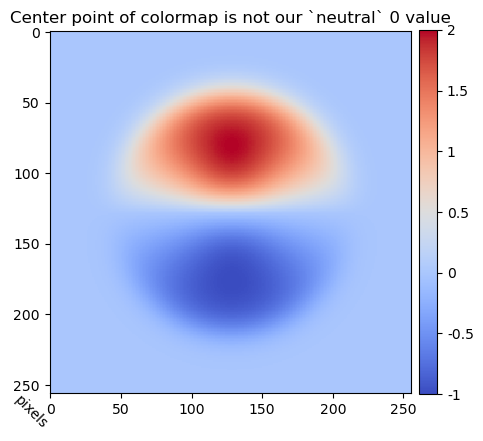

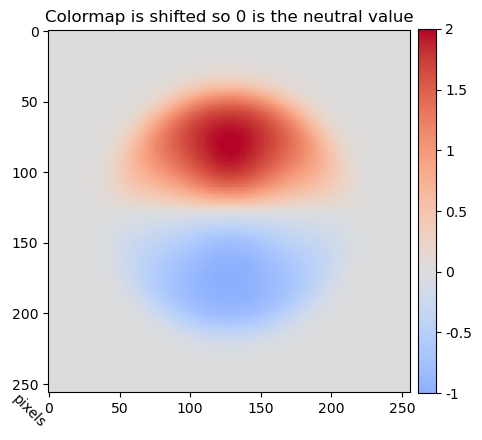

In [4]:
from PyLorentz.visualize.colorwheel import get_cmap, shift_cmap_center

div = get_cmap("diverging")

bx2 = np.where(bloch_x>0, bloch_x*2, bloch_x)

show_im(
    bx2,
    cmap=div,
    title="Center point of colormap is not our `neutral` 0 value",
)

vmin = bx2.min()
vmax = bx2.max()
midpointval = 0
div2 = shift_cmap_center(div, midpointval=midpointval, vmin=vmin, vmax=vmax)
show_im(bx2, cmap=div2, title="Colormap is shifted so 0 is the neutral value")

## lineplots
PyLorentz also has a built in function for extracting line plots through a scalar image. 

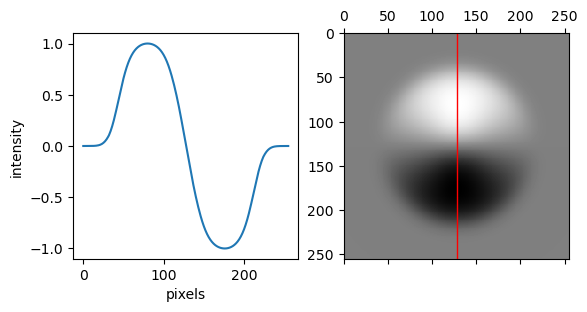

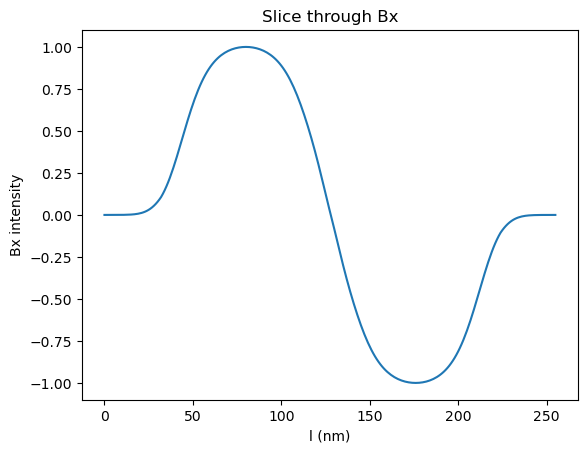

In [5]:
profile_1 = lineplot_im(
    bloch_x,
    show=True,
    phi=90,
)

scale = 1
x = np.arange(len(profile_1)) * scale
fig, ax = plt.subplots()
ax.plot(x, profile_1)
ax.set_ylabel("Bx intensity")
ax.set_xlabel("l (nm)")
ax.set_title("Slice through Bx")
plt.show()

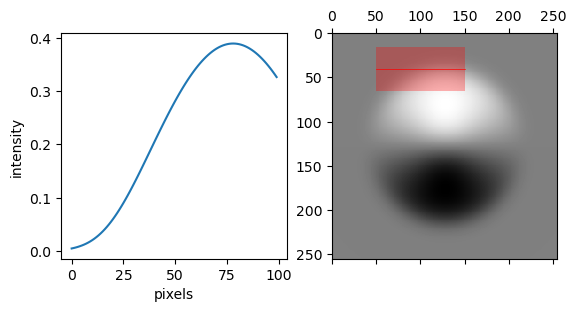

In [6]:
profile_2 = lineplot_im(
    bloch_x,
    center=[40,100],
    linewidth=50,
    line_len=100,
    show=True,
)

## displaying vector images

The default colormap for vector images is `colorcet.cm.CET_C6`, an improved 6-fold hsv map. A four-fold option can be selected with: `'4fold'` (`colorcet.cm.CET_C7`). 

In [7]:
bloch_z, bloch_y, bloch_x = bloch(dim=256,
                   chirality="cw",
                   pad=32,
                   ir=0,
                   bkg="pos")

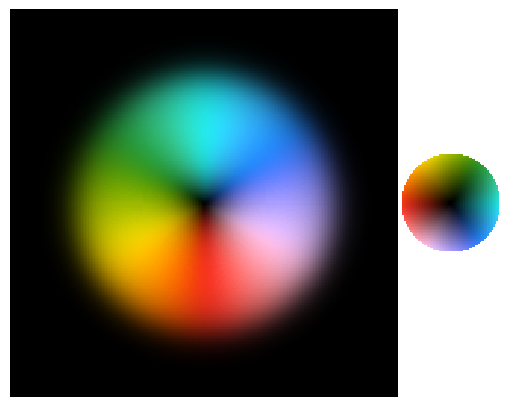

In [8]:
show_2D(bloch_x,
        bloch_y,
        bz=None,
        num_arrows=0,
        cmap='hsv',
        cbar=True,
        rad=32, # colorwheel radius
)

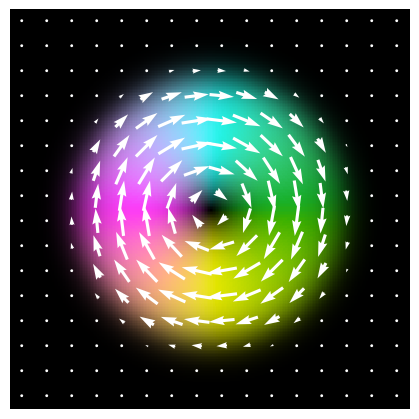

In [9]:
# displaying with arrows overlaid
show_2D(bloch_x,
        bloch_y,
        bz=None,
        cmap='4fold',
        rad = 0,
        num_arrows=16,
        arrow_size=20,
        arrow_width=2,
        shift=np.pi/2,
        figsize=(4,4),
)

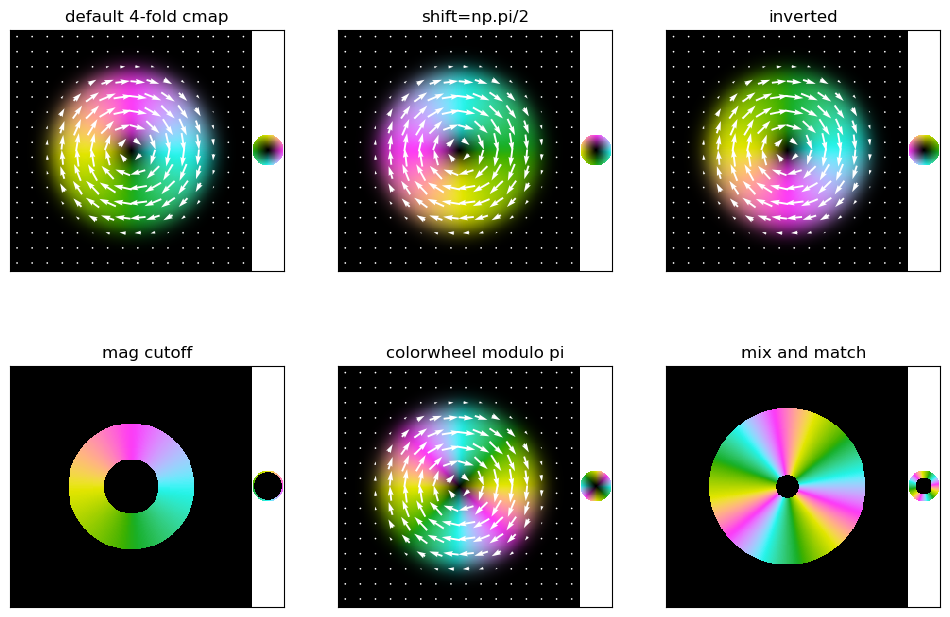

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))


show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[0,0]),
    title="default 4-fold cmap",
    num_arrows=16,
    arrow_size=20,
    arrow_width=2,
)

show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[0,1]),
    shift=np.pi / 2,
    title="shift=np.pi/2",
    num_arrows=16,
    arrow_size=20,
    arrow_width=2,
)

show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[0,2]),
    invert=True,
    title="inverted",
    num_arrows=16,
    arrow_size=20,
    arrow_width=2,
)

show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[1,0]),
    mag_cutoff = 0.9,
    title="mag cutoff",
)

show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[1,1]),
    modulo=np.pi,
    title="colorwheel modulo pi",
    num_arrows=16,
    arrow_size=20,
    arrow_width=2,
)

show_2D(
    bloch_x,
    bloch_y,
    cmap="4fold",
    figax=(fig, axs[1,2]),
    modulo=2*np.pi/3,
    invert=True,
    shift=np.pi/6,
    mag_cutoff=0.5,
    title="mix and match",
)



The z-component of the vector field can also be displayed, with the z-component mapping to white/black as $\cos(\phi)^2$, for the out-of-plane angle $\phi$. 

This can cause problems for the default hsv map as it can appear that there is a strong in-plane component when there really isn't or other artifacts. One alternative is to use an HSL color space and map vector orientation to hue, z-component to lightness, and in-plane magnitude to saturation. This will rescale the colormap, and therefore only works with a colorspace uniform (but not perceptually uniform) hsv colormap. This fixes some issues, but a true hsv colormap has strong peaks at cyan/yellow/pink, so it's not a perfect solution either. 

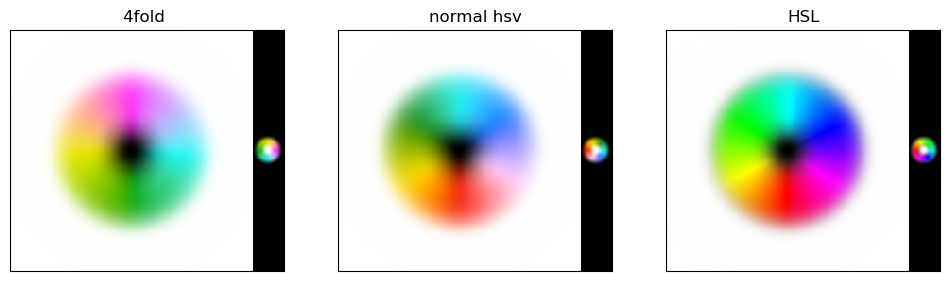

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))
show_2D(bloch_x, bloch_y, bloch_z, cmap='4fold', title="4fold ", figax=(fig, axs[0]))
show_2D(bloch_x, bloch_y, bloch_z, cmap='hsv', title="normal hsv", figax=(fig, axs[1]))
show_2D(bloch_x, bloch_y, bloch_z, HSL=True, title="HSL", figax=(fig, axs[2]))

we can also generate and plot just the colorwheel (useful for figure making)

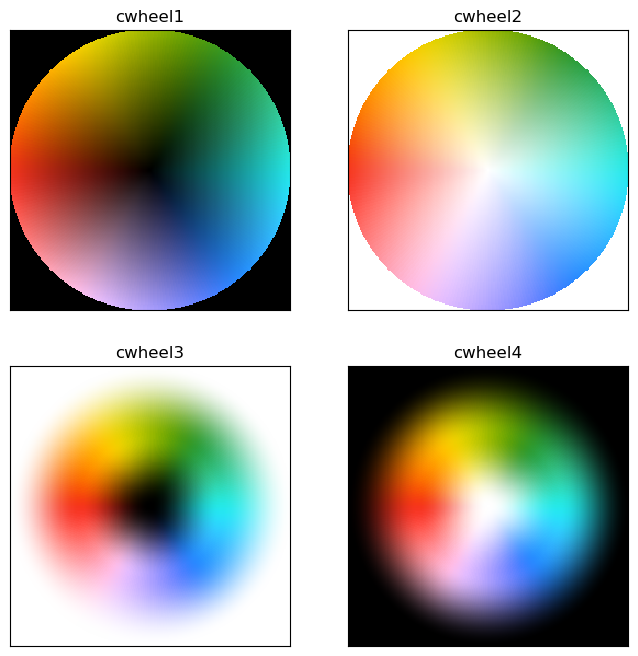

In [12]:
from PyLorentz.visualize.colorwheel import make_colorwheel, make_colorwheelz

cmap = get_cmap("cyclic")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))


cwheel1 = make_colorwheel(rad=128, cmap=cmap)
show_im(cwheel1, "cwheel1", figax=(fig, axs[0,0]), simple=True)

cwheel2 = make_colorwheel(rad=128, cmap=cmap, background="white", core="white")
show_im(cwheel2, "cwheel2", figax=(fig, axs[0,1]), simple=True)

cwheel3 = make_colorwheelz(rad=128, cmap=cmap, outside="white")
show_im(cwheel3, "cwheel3", figax=(fig, axs[1,0]), simple=True)

cwheel4 = make_colorwheelz(rad=128, cmap=cmap, outside="black")
show_im(cwheel4, "cwheel4", figax=(fig, axs[1,1]), simple=True)
plt.show()

## Hopfion magnetization visualization 

In [13]:
hopf_z, hopf_y, hopf_x = hopfion(dim=256)
print(hopf_z.shape)

(64, 256, 256)


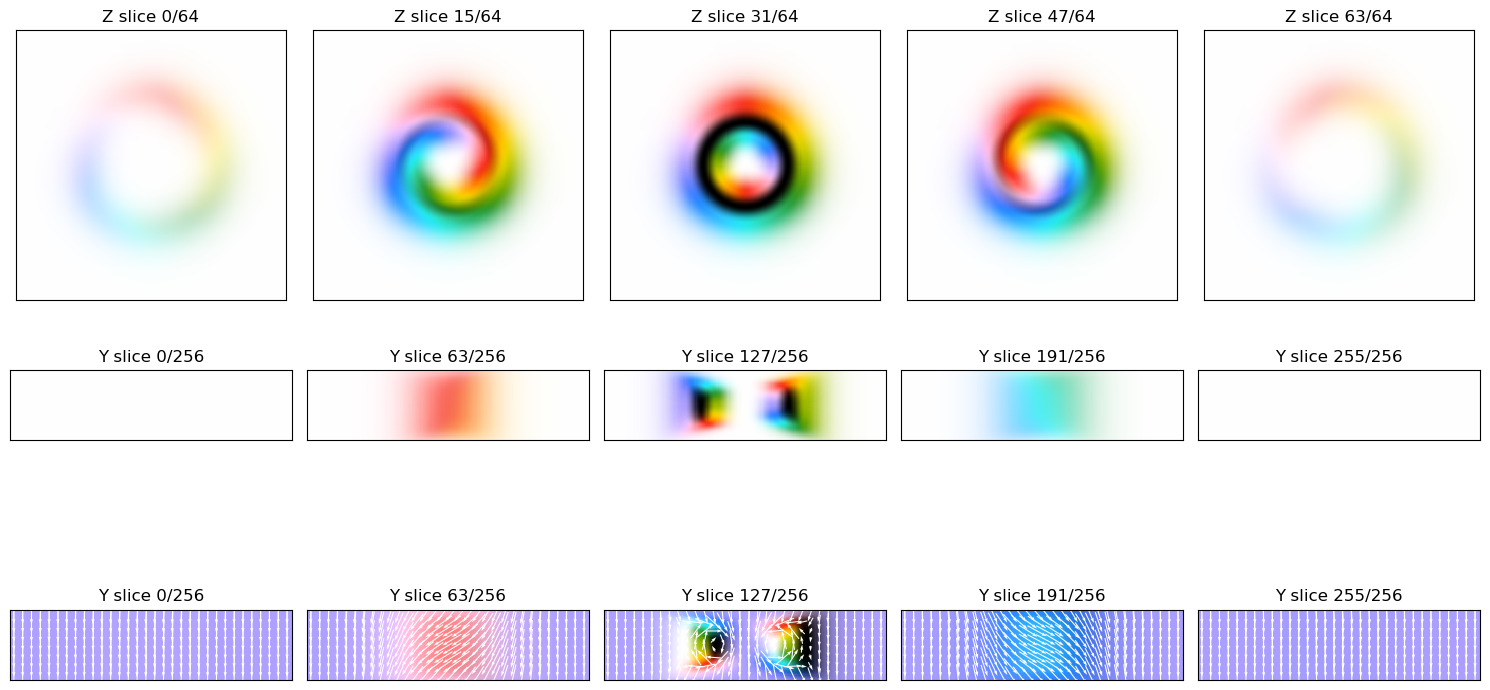

In [14]:
# note that when plotting slices through a volume, you must choose how you want the colormaps to correspond to vector components
# here we show both slices along the y-axis with the top-down colormap (z -> black/white) and with
# the "rotated" colormap (black/white -> y, as it is the out-of-page vector direction)

nslices = 5

fig, axs = plt.subplots(ncols=nslices, nrows=3, figsize=(nslices*3, 8))
for i, (z_slice, y_slice) in enumerate(zip(np.linspace(0, hopf_z.shape[0]-1, nslices), np.linspace(0, hopf_z.shape[1]-1, nslices))):
    z_slice = int(z_slice)
    y_slice = int(y_slice)
    show_2D(hopf_x[z_slice], hopf_y[z_slice], hopf_z[z_slice], figax=(fig, axs[0, i]), rad=0, title=f"Z slice {z_slice}/{hopf_z.shape[0]}")
    show_2D(hopf_x[:, y_slice], hopf_y[:, y_slice], hopf_z[:, y_slice], figax=(fig, axs[1, i]), rad=0, title=f"Y slice {y_slice}/{hopf_z.shape[1]}")
    show_2D(hopf_x[:, y_slice], hopf_z[:, y_slice],  hopf_y[:, y_slice], figax=(fig, axs[2, i]), rad=0, num_arrows=8, arrow_size=20, title=f"Y slice {y_slice}/{hopf_z.shape[1]}")

plt.tight_layout()
plt.show()